In [425]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import nsepython as nse
import datetime 
import time
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error



In [426]:
# Inputs
# Date input
from_date = datetime.date(year=2015,month=1,day=1).strftime("%Y-%m-%d")
to_date = (datetime.date(year=2025,month=8,day=6)).strftime("%Y-%m-%d")
print(datetime.datetime.now(),' : Date inputs taken!')


2025-08-06 15:33:53.358935  : Date inputs taken!


In [427]:
df = yf.download('^NSEI',start=from_date,end=to_date)
df.columns = ['CLOSE','HIGH','LOW','OPEN','VOLUME']
df.drop('VOLUME',axis=1,inplace=True)
df['Date'] = df.index

for i in ['CLOSE','HIGH','LOW','OPEN']:
    df[i] = round((df[i]-df[i].shift(1))/df[i]*100,2)

print(datetime.datetime.now(),' : Data loaded and featured configured!')
df = df[-2501:]
df  


/tmp/ipykernel_26991/2237747002.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('^NSEI',start=from_date,end=to_date)
[*********************100%***********************]  1 of 1 completed

2025-08-06 15:33:54.929483  : Data loaded and featured configured!


,CLOSE,HIGH,LOW,OPEN,Date
Date,,,,,
2015-06-12,0.22,-2.09,-0.23,-2.48,2015-06-12
2015-06-15,0.39,0.77,0.06,0.33,2015-06-15
2015-06-16,0.42,0.05,0.09,0.22,2015-06-16
2015-06-17,0.55,0.92,1.20,0.99,2015-06-17
2015-06-18,1.02,0.61,0.65,0.36,2015-06-18
...,...,...,...,...,...
2025-07-30,0.14,0.22,0.70,1.13,2025-07-30
2025-07-31,-0.35,0.22,-0.56,-1.01,2025-07-31
2025-08-01,-0.83,-0.70,-0.41,0.37,2025-08-01


In [428]:
# Additional feature generation 
for k in [5,15,30,90]:
    for j in ['OPEN','HIGH','LOW','CLOSE']:
        avg = []
        for i in range(df.shape[0]):
            average = df[j].iloc[i:i+k].mean()
            avg.append(average)

        df[f'{j}_{k}dayMean'] = average


df['NXT_OPEN'] = df['OPEN'].shift(-1)
print(datetime.datetime.now(),' : Additional features generated!')

2025-08-06 15:34:00.934394  : Additional features generated!


In [429]:
# Date feature dropped
df = df.drop('Date',axis=1)
print(datetime.datetime.now(),' : date feature dropped!')  
df


2025-08-06 15:34:02.528263  : date feature dropped!


,CLOSE,HIGH,LOW,OPEN,OPEN_5dayMean,HIGH_5dayMean,LOW_5dayMean,CLOSE_5dayMean,OPEN_15dayMean,HIGH_15dayMean,...,CLOSE_15dayMean,OPEN_30dayMean,HIGH_30dayMean,LOW_30dayMean,CLOSE_30dayMean,OPEN_90dayMean,HIGH_90dayMean,LOW_90dayMean,CLOSE_90dayMean,NXT_OPEN
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-12,0.22,-2.09,-0.23,-2.48,0.5,-0.01,0.15,-0.3,0.5,-0.01,...,-0.3,0.5,-0.01,0.15,-0.3,0.5,-0.01,0.15,-0.3,0.33
2015-06-15,0.39,0.77,0.06,0.33,0.5,-0.01,0.15,-0.3,0.5,-0.01,...,-0.3,0.5,-0.01,0.15,-0.3,0.5,-0.01,0.15,-0.3,0.22
2015-06-16,0.42,0.05,0.09,0.22,0.5,-0.01,0.15,-0.3,0.5,-0.01,...,-0.3,0.5,-0.01,0.15,-0.3,0.5,-0.01,0.15,-0.3,0.99
2015-06-17,0.55,0.92,1.20,0.99,0.5,-0.01,0.15,-0.3,0.5,-0.01,...,-0.3,0.5,-0.01,0.15,-0.3,0.5,-0.01,0.15,-0.3,0.36
2015-06-18,1.02,0.61,0.65,0.36,0.5,-0.01,0.15,-0.3,0.5,-0.01,...,-0.3,0.5,-0.01,0.15,-0.3,0.5,-0.01,0.15,-0.3,1.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-30,0.14,0.22,0.70,1.13,0.5,-0.01,0.15,-0.3,0.5,-0.01,...,-0.3,0.5,-0.01,0.15,-0.3,0.5,-0.01,0.15,-0.3,-1.01
2025-07-31,-0.35,0.22,-0.56,-1.01,0.5,-0.01,0.15,-0.3,0.5,-0.01,...,-0.3,0.5,-0.01,0.15,-0.3,0.5,-0.01,0.15,-0.3,0.37
2025-08-01,-0.83,-0.70,-0.41,0.37,0.5,-0.01,0.15,-0.3,0.5,-0.01,...,-0.3,0.5,-0.01,0.15,-0.3,0.5,-0.01,0.15,-0.3,-0.56


In [436]:
# Generate X_sample for prediction
X_sample = df.iloc[-1:,1:]
Today_open = input(f"Input opening price on {to_date} : ")
X_sample.iloc[:,-1] = Today_open

df.dropna(inplace=True)

print(datetime.datetime.now(),' : X_sample generated!')  


2025-08-06 15:35:54.967962  : X_sample generated!


/tmp/ipykernel_26991/1032441878.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-.32' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_sample.iloc[:,-1] = Today_open


In [437]:
# train test data generation
X_train,X_test,y_train,y_test = train_test_split(df.drop('CLOSE',axis=1),df['CLOSE'],
                                                 test_size=0.2,random_state=11,
                                                 shuffle=False)

print(datetime.datetime.now(),' : Train/test data generated!')  




2025-08-06 15:35:59.856278  : Train/test data generated!


In [438]:
# Modeling
model = XGBRegressor()
print(datetime.datetime.now(),' : XGBoost model intialised!')  


2025-08-06 15:36:03.501937  : XGBoost model intialised!


In [439]:
# Model fitting
model.fit(X_train,y_train)
print(datetime.datetime.now(),' : Model fitted on train data!')  


2025-08-06 15:36:05.432157  : Model fitted on train data!


In [440]:
# Prediction
y_pred = model.predict(X_test)
print(datetime.datetime.now(),' : Predictions done for test data!') 


2025-08-06 15:36:06.964712  : Predictions done for test data!


In [434]:
# RMSE calculation
rmse = root_mean_squared_error(y_test,y_pred)
print(datetime.datetime.now(),' : RMSE performance metric calculated!') 


2025-08-06 15:35:17.304832  : RMSE performance metric calculated!


In [441]:
# Prediction table for test data
pred_table = pd.DataFrame()
pred_table['Actual'] = y_test
pred_table['Predicted'] = y_pred
pred_table['ABSError'] = abs(pred_table['Actual']-pred_table['Predicted'])
print(datetime.datetime.now(),' : Prediction table generated!') 



print(pred_table)

2025-08-06 15:36:09.456436  : Prediction table generated!
            Actual  Predicted  ABSError
Date                                   
2023-07-26    0.49   0.559888  0.069888
2023-07-27   -0.60  -0.711184  0.111184
2023-07-28   -0.07  -0.163552  0.093552
2023-07-31    0.55   0.464271  0.085729
2023-08-01   -0.10  -0.214051  0.114051
...            ...        ...       ...
2025-07-29    0.56   0.516887  0.043113
2025-07-30    0.14  -0.224752  0.364752
2025-07-31   -0.35   0.160159  0.510159
2025-08-01   -0.83  -0.966423  0.136423
2025-08-04    0.64   0.434155  0.205845

[500 rows x 3 columns]


In [452]:
avg_error = pred_table['ABSError'].mean()
print(f'On an average predictions are off by +/- {int(avg_error)} %')


On an average predictions are off by +/- 0 %


In [488]:
sample_pred = model.predict(np.array(X_sample))[0]

print(f"Close % change on {to_date} : {sample_pred}%")

Close % change on 2025-08-06 : 0.22625800967216492%


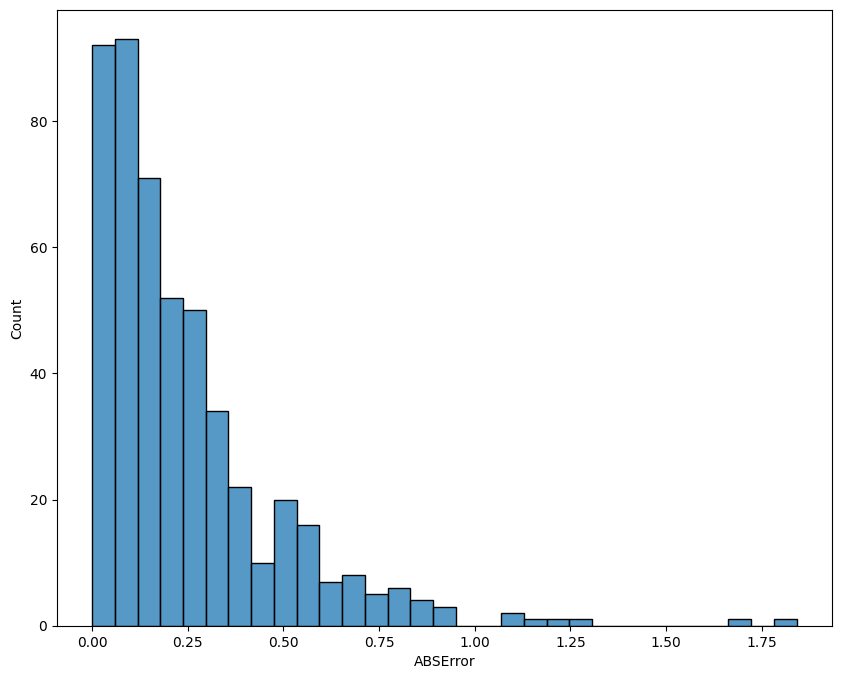

In [489]:
data = pred_table.reset_index()

plt.figure(figsize=(10,8))
sns.histplot(pred_table['ABSError'])
plt.show()

In [493]:
percentile = 85
val1 = np.percentile(a=pred_table['ABSError'],q=percentile)
print("For given test data")
print(f"Predicted values fall within +/- {val1}% of actual price with probability of 85%")


For given test data
Predicted values fall within +/- 0.47655533862113947% of actual price with probability of 85%
